### 군집

In [1]:
import numpy as np
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

#### Data

In [2]:
final_num = pd.read_csv('./data/final_num_data1.csv', encoding='cp949')
final_cat = pd.read_csv('./data/final_cat_data1.csv', encoding='cp949')

In [3]:
final_num

,화재예방지수,용수시설지수,총인구수 (명)
0,2.813950,1.472174,0.304885
1,2.590587,0.619892,0.573692
2,2.693068,1.485158,0.575648
3,1.927146,1.713634,0.402474
4,2.704669,0.479700,0.889368
...,...,...,...
138,0.795778,1.335415,0.981656
139,1.224926,1.172767,0.969644
140,1.189922,1.158339,0.964217
141,1.291631,1.309182,1.000000


In [4]:
# del final_num['총인구수 (명)']

## K-Means

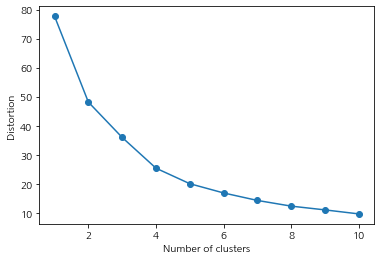

In [5]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(final_num)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

# plot - 급격하게 줄어드는 부분
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

3개의 군집이 최적의 군집수로 판단

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, random_state = 10)

# 정규화된 데이터에 학습
model.fit(final_num)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
final_num['cluster'] = model.fit_predict(final_num)
final_num.head()

,화재예방지수,용수시설지수,총인구수 (명),cluster
0,2.813950,1.472174,0.304885,1
1,2.590587,0.619892,0.573692,2
2,2.693068,1.485158,0.575648,1
3,1.927146,1.713634,0.402474,0
4,2.704669,0.479700,0.889368,2


In [7]:
K_means3 = pd.concat([final_cat, final_num], axis=1)
K_means3.head()

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),cluster
0,홍천군 홍천읍,홍천읍,홍천군,2.813950,1.472174,0.304885,1
1,횡성군 횡성읍,횡성읍,횡성군,2.590587,0.619892,0.573692,2
2,영월군 영월읍,영월읍,영월군,2.693068,1.485158,0.575648,1
3,원주시 지정면,지정면,원주시,1.927146,1.713634,0.402474,0
4,태백시 황지동,황지동,태백시,2.704669,0.479700,0.889368,2


In [8]:
k_means_labels = model.labels_ 
print('k_means_labels : ', k_means_labels)
k_means_cluster_centers = model.cluster_centers_ 
print('k_means_cluster_centers : ', k_means_cluster_centers)

k_means_labels :  [1 2 1 0 2 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 2 0 1 2 2 1 0 1 0 1 1 2
 1 2 0 2 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 2 1 2 1 0 1 2 1 0 0 2 1 0 1 0
 2 0 0 2 0 1 1 2 0 1 1 1 1 0 2 1 1 2 2 2 0 0 0 0 0 1 0 1 1 0 0 0 2 0 0 1 2
 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 2 0 0 2 0 0 1 0 0 0 0 0 2]
k_means_cluster_centers :  [[1.69746312 1.35156864 0.91401016]
 [2.63967371 1.32014763 0.77586369]
 [1.98092873 0.49795265 0.91617581]]


Text(0.5, 1.0, 'K = 3 results')

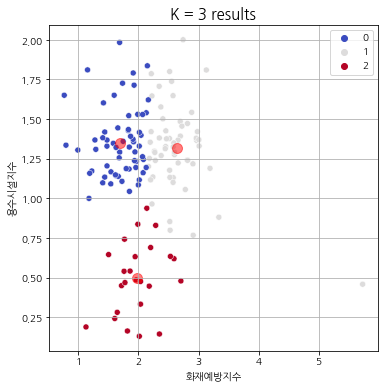

In [9]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x = final_num['화재예방지수'], y = final_num['용수시설지수'], data=final_num, hue=model.labels_,palette='coolwarm')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', alpha=0.5, s=100)
plt.grid()
plt.title('K = 3 results' , size = 15)

K-means군집에서 2로 분류된 데이터는 화재예방지수와 용수시설지수가 모두 낮게 나타남

즉, 최적입지선정에 필요한 데이터라고 판단할 수 있음

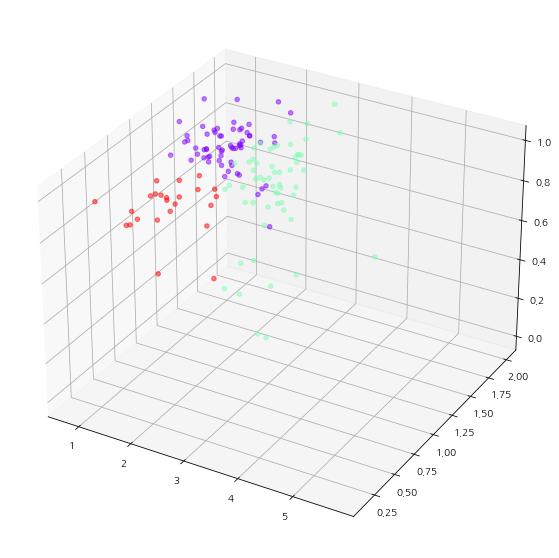

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = final_num['화재예방지수']
y = final_num['용수시설지수']
z = final_num['총인구수 (명)']
ax.scatter(x, y, z, c = model.labels_, s= 20, alpha=0.5, cmap='rainbow')

In [11]:
K_means3[K_means3['cluster'] == 2]

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),cluster
1,횡성군 횡성읍,횡성읍,횡성군,2.590587,0.619892,0.573692,2
4,태백시 황지동,황지동,태백시,2.704669,0.479700,0.889368,2
25,양양군 양양읍,양양읍,양양군,2.347861,0.145222,0.747938,2
28,양양군 강현면,강현면,양양군,2.286137,0.829992,0.918462,2
29,평창군 진부면,진부면,평창군,2.138564,0.938017,0.835009,2
36,횡성군 우천면,우천면,횡성군,1.944559,0.632730,0.921470,2
38,정선군 고한읍,고한읍,정선군,2.530569,0.634590,0.923174,2
40,횡성군 둔내면,둔내면,횡성군,1.606702,0.243027,0.891577,2
59,횡성군 안흥면,안흥면,횡성군,1.760726,0.540655,0.947850,2
61,양양군 현남면,현남면,양양군,1.767994,0.742863,0.952836,2


## DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
final_num = pd.read_csv('./data/final_num_data1.csv', encoding='cp949')

In [14]:
db_scan = DBSCAN(eps=0.4, min_samples=14).fit(final_num.values)
final_num['cluster_db'] = db_scan.labels_

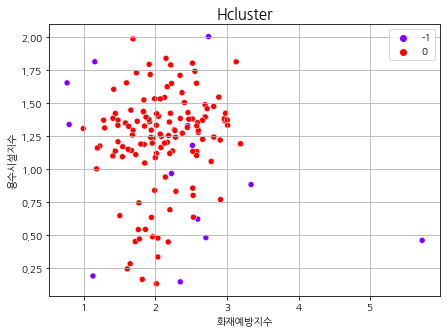

In [15]:
plt.figure(figsize=(7,5))
plt.title("Hcluster", fontsize=15)
sns.scatterplot(x = final_num['화재예방지수'], y = final_num['용수시설지수'], data=final_num, hue=db_scan.labels_, palette='rainbow')
# plt.scatter(final_num['화재예방지수'],final_num['용수시설지수'],c=final_num['cluster_db'])
plt.grid()
plt.show()

In [16]:
dbscan = pd.concat([final_cat, final_num], axis=1)
dbscan.head()

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),cluster_db
0,홍천군 홍천읍,홍천읍,홍천군,2.813950,1.472174,0.304885,0
1,횡성군 횡성읍,횡성읍,횡성군,2.590587,0.619892,0.573692,-1
2,영월군 영월읍,영월읍,영월군,2.693068,1.485158,0.575648,0
3,원주시 지정면,지정면,원주시,1.927146,1.713634,0.402474,0
4,태백시 황지동,황지동,태백시,2.704669,0.479700,0.889368,-1


In [17]:
dbscan[dbscan['cluster_db'] == 2]

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),cluster_db


## 계층적군집

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
final_num = pd.read_csv('./data/final_num_data1.csv', encoding='cp949')

In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(final_num)

array([1, 2, 4, 1, 2, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 0, 4, 4, 1, 1, 0,
       2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 4, 0, 1, 1, 2, 4, 2, 0, 2, 1, 4, 0,
       1, 0, 1, 0, 0, 4, 0, 0, 0, 1, 4, 2, 0, 1, 0, 2, 1, 2, 1, 0, 4, 2,
       4, 0, 0, 2, 1, 0, 4, 0, 2, 0, 0, 2, 0, 4, 1, 2, 0, 1, 4, 4, 4, 0,
       2, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 1, 2, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 4, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2], dtype=int64)

In [21]:
final_num['hcluster'] = cluster.labels_
final_num

,화재예방지수,용수시설지수,총인구수 (명),hcluster
0,2.813950,1.472174,0.304885,1
1,2.590587,0.619892,0.573692,2
2,2.693068,1.485158,0.575648,4
3,1.927146,1.713634,0.402474,1
4,2.704669,0.479700,0.889368,2
...,...,...,...,...
138,0.795778,1.335415,0.981656,0
139,1.224926,1.172767,0.969644,0
140,1.189922,1.158339,0.964217,0
141,1.291631,1.309182,1.000000,0


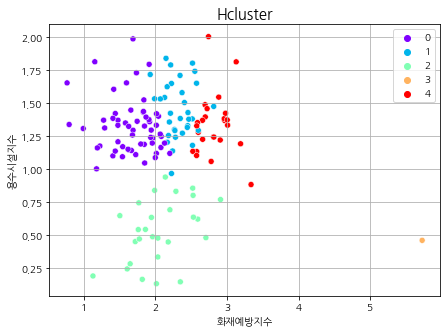

In [22]:
plt.figure(figsize=(7,5))
plt.title("Hcluster", fontsize=15)
sns.scatterplot(x = final_num['화재예방지수'], y = final_num['용수시설지수'], data=final_num, hue=cluster.labels_, palette='rainbow')
# plt.scatter(final_num['화재예방지수'],final_num['용수시설지수'],c=final_num['cluster_db'])
plt.grid()
plt.show()

In [23]:
hcluster = pd.concat([final_cat, final_num], axis=1)
hcluster.head()

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),hcluster
0,홍천군 홍천읍,홍천읍,홍천군,2.813950,1.472174,0.304885,1
1,횡성군 횡성읍,횡성읍,횡성군,2.590587,0.619892,0.573692,2
2,영월군 영월읍,영월읍,영월군,2.693068,1.485158,0.575648,4
3,원주시 지정면,지정면,원주시,1.927146,1.713634,0.402474,1
4,태백시 황지동,황지동,태백시,2.704669,0.479700,0.889368,2


In [24]:
hcluster[hcluster['hcluster'] == 2]

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),hcluster
1,횡성군 횡성읍,횡성읍,횡성군,2.590587,0.619892,0.573692,2
4,태백시 황지동,황지동,태백시,2.704669,0.479700,0.889368,2
22,동해시 발한동,발한동,동해시,2.520577,0.853991,0.945305,2
25,양양군 양양읍,양양읍,양양군,2.347861,0.145222,0.747938,2
28,양양군 강현면,강현면,양양군,2.286137,0.829992,0.918462,2
29,평창군 진부면,진부면,평창군,2.138564,0.938017,0.835009,2
36,횡성군 우천면,우천면,횡성군,1.944559,0.632730,0.921470,2
38,정선군 고한읍,고한읍,정선군,2.530569,0.634590,0.923174,2
40,횡성군 둔내면,둔내면,횡성군,1.606702,0.243027,0.891577,2
55,태백시 장성동,장성동,태백시,2.525770,0.799324,0.945389,2


---

#### 군집간의 공통행
세개의 군집에서 중복되는 곳을 취약한 지점으로 지정 후 입지선정

In [25]:
k = K_means3[K_means3['cluster'] == 2]
d = dbscan[dbscan['cluster_db'] == 0]
h = hcluster[hcluster['hcluster'] == 2]

In [26]:
k = K_means3[K_means3['cluster'] == 2]
k

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),cluster
1,횡성군 횡성읍,횡성읍,횡성군,2.590587,0.619892,0.573692,2
4,태백시 황지동,황지동,태백시,2.704669,0.479700,0.889368,2
25,양양군 양양읍,양양읍,양양군,2.347861,0.145222,0.747938,2
28,양양군 강현면,강현면,양양군,2.286137,0.829992,0.918462,2
29,평창군 진부면,진부면,평창군,2.138564,0.938017,0.835009,2
36,횡성군 우천면,우천면,횡성군,1.944559,0.632730,0.921470,2
38,정선군 고한읍,고한읍,정선군,2.530569,0.634590,0.923174,2
40,횡성군 둔내면,둔내면,횡성군,1.606702,0.243027,0.891577,2
59,횡성군 안흥면,안흥면,횡성군,1.760726,0.540655,0.947850,2
61,양양군 현남면,현남면,양양군,1.767994,0.742863,0.952836,2


In [27]:
kdh = pd.concat([k, h], axis=0)

In [28]:
# 중복되는행을 모두 제거 => 중복안되는 행만 남음 => 중복안되는 행을 빼고 duplicates 다시하기
kdh_uni = kdh.drop_duplicates(['Full_NM'], keep = False)
kdh_uni

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),cluster,hcluster
22,동해시 발한동,발한동,동해시,2.520577,0.853991,0.945305,NaN,2.0
55,태백시 장성동,장성동,태백시,2.525770,0.799324,0.945389,NaN,2.0
90,영월군 상동읍,상동읍,영월군,2.908758,0.767700,0.993668,NaN,2.0


In [29]:
kdh = kdh.drop_duplicates(['Full_NM'])
kdh = kdh.drop([22, 55, 90])
kdh

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),cluster,hcluster
1,횡성군 횡성읍,횡성읍,횡성군,2.590587,0.619892,0.573692,2.0,NaN
4,태백시 황지동,황지동,태백시,2.704669,0.479700,0.889368,2.0,NaN
25,양양군 양양읍,양양읍,양양군,2.347861,0.145222,0.747938,2.0,NaN
28,양양군 강현면,강현면,양양군,2.286137,0.829992,0.918462,2.0,NaN
29,평창군 진부면,진부면,평창군,2.138564,0.938017,0.835009,2.0,NaN
36,횡성군 우천면,우천면,횡성군,1.944559,0.632730,0.921470,2.0,NaN
38,정선군 고한읍,고한읍,정선군,2.530569,0.634590,0.923174,2.0,NaN
40,횡성군 둔내면,둔내면,횡성군,1.606702,0.243027,0.891577,2.0,NaN
59,횡성군 안흥면,안흥면,횡성군,1.760726,0.540655,0.947850,2.0,NaN
61,양양군 현남면,현남면,양양군,1.767994,0.742863,0.952836,2.0,NaN


In [30]:
kdh['SGG_NM'].value_counts()

횡성군    7
양양군    6
정선군    3
영월군    3
동해시    2
태백시    1
평창군    1
삼척시    1
Name: SGG_NM, dtype: int64